In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tifffile
import glob
import seg_nucl_utils as snu

In [2]:
#first get all of the dapi tif files in example data
dapinames=sorted(glob.glob('example_data/*001.tif'))
dapinames[:5]

['example_data/003003-1-001001001.tif',
 'example_data/003003-10-001001001.tif',
 'example_data/003003-11-001001001.tif',
 'example_data/003003-12-001001001.tif',
 'example_data/003003-13-001001001.tif']

In [3]:
#go through and add the analysis from each image to a list
dfs=[]
for i in range(len(dapinames)):
    basename=dapinames[i][:-5]
    print('analyzing',basename+'1.tif')
    imgs=[tifffile.imread(basename+str(i)+'.tif') for i in range(1,4)]
    dapisub,dapimask,dapilabels,nnuclei=snu.segmentNuclei(imgs[0])
    nucleoli,third,nucleolilabels,nnucleoli=snu.segmentNucleoli(imgs[2],imgs[1],dapilabels,nnuclei)
    df=snu.measureAll(dapilabels,nnuclei,nucleolilabels,nnucleoli,nucleoli,third)
    print('found',nnuclei,'nuclei and',nnucleoli,'nucleoli')
    #add the name to the dataframe so we can get that info later
    df['name']=dapinames[i].split('/')[-1]
    dfs.append(df)
    tifffile.imwrite(basename+'1_mask.tif',dapilabels>0.5)
    tifffile.imwrite(basename+'1_nuclmask.tif',nucleolilabels>0.5)

analyzing example_data/003003-1-001001001.tif
found 17 nuclei and 58 nucleoli
analyzing example_data/003003-10-001001001.tif
found 22 nuclei and 66 nucleoli
analyzing example_data/003003-11-001001001.tif
found 18 nuclei and 55 nucleoli
analyzing example_data/003003-12-001001001.tif
found 9 nuclei and 24 nucleoli
analyzing example_data/003003-13-001001001.tif
found 10 nuclei and 23 nucleoli
analyzing example_data/003003-14-001001001.tif
found 32 nuclei and 105 nucleoli
analyzing example_data/003003-15-001001001.tif
found 17 nuclei and 47 nucleoli
analyzing example_data/003003-16-001001001.tif
found 18 nuclei and 57 nucleoli
analyzing example_data/003003-17-001001001.tif
found 47 nuclei and 164 nucleoli
analyzing example_data/003003-18-001001001.tif
found 39 nuclei and 127 nucleoli
analyzing example_data/003003-19-001001001.tif
found 11 nuclei and 28 nucleoli
analyzing example_data/003003-2-001001001.tif
found 84 nuclei and 254 nucleoli
analyzing example_data/003003-20-001001001.tif
foun

In [4]:
dfs[0].head()

,id,nuclear_id,nuclear_area,nuclear_avg,nuclear_stdev,number_nucleoli,nucleolar_area,nucleolar_avg,nucleolar_stdev,third_nucavg,third_nucstdev,third_nuclavg,third_nuclstdev,name
0,0,1,2410.0,1522.423268,1455.759119,2,26.0,4929.816548,755.623877,1296.417575,2285.924745,6297.444119,1026.167695,003003-1-001001001.tif
1,1,1,2410.0,1522.423268,1455.759119,2,135.0,6465.998136,1627.561479,1296.417575,2285.924745,9216.298214,2509.037986,003003-1-001001001.tif
2,2,2,3006.0,1556.982159,1696.827323,5,10.0,6076.138290,607.914783,1403.773721,2337.835445,5458.711977,498.735120,003003-1-001001001.tif
3,3,2,3006.0,1556.982159,1696.827323,5,29.0,7617.586642,1592.930798,1403.773721,2337.835445,9013.172040,1986.515250,003003-1-001001001.tif
4,4,2,3006.0,1556.982159,1696.827323,5,23.0,7103.205879,1397.099696,1403.773721,2337.835445,7795.831612,1204.371766,003003-1-001001001.tif


In [5]:
#concatenate the dataframes and save them
alldf=pd.concat(dfs).reset_index(drop=True)
alldf.to_csv('all_img_measurements.csv')

In [6]:
#start by aggregating the nucleoli together
dfavg=alldf.groupby(['name','nuclear_id']).agg('mean')

In [7]:
dfavg.head()

id  nuclear_area  nuclear_avg  \
name                   nuclear_id                                    
003003-1-001001001.tif 1.0          0.5        2410.0  1522.423268   
                       2.0          4.0        3006.0  1556.982159   
                       3.0          8.0        2534.0  1465.758567   
                       4.0         11.5        2084.0  1966.867648   
                       5.0         16.0        2259.0  2145.047947   

                                   nuclear_stdev  number_nucleoli  \
name                   nuclear_id                                   
003003-1-001001001.tif 1.0           1455.759119              2.0   
                       2.0           1696.827323              5.0   
                       3.0           1284.615167              3.0   
                       4.0           1477.533833              4.0   
                       5.0           1920.534223              5.0   

                                   nucleolar_area  nucleolar_avg  \
name                   nuclear_id                                  
003003-1-001001001.tif 1.0                   80.5    5697.907342   
                       2.0                   30.0    7315.438852   
                       3.0                   34.0    5889.262202   
                       4.0                   57.0    5146.195512   
                       5.0                   40.8    6872.403584   

                                   nucleolar_stdev  third_nucavg  \
name                   nuclear_id                                  
003003-1-001001001.tif 1.0             1191.592678   1296.417575   
                       2.0             1439.814964   1403.773721   
                       3.0              893.705719   1074.074521   
                       4.0              850.748443   2083.068963   
                       5.0             1295.650714   1991.653550   

                                   third_nucstdev  third_nuclavg  \
name                   nuclear_id                                  
003003-1-001001001.tif 1.0            2285.924745    7756.871166   
                       2.0            2337.835445    8648.766109   
                       3.0            1620.456095    6531.376343   
                       4.0            2916.697730    8029.232959   
                       5.0            3279.893963   10059.272797   

                                   third_nuclstdev  
name                   nuclear_id                   
003003-1-001001001.tif 1.0             1767.602840  
                       2.0             1581.897730  
                       3.0             1060.248498  
                       4.0             1495.104706  
                       5.0             2179.338041

In [8]:
#now calculate the enrichment and normality
dfavg['int_nucleolar']=dfavg['nucleolar_avg']*dfavg['nucleolar_area']*dfavg['number_nucleoli']
dfavg['int_nucleoplasm']=dfavg['nuclear_area']*dfavg['nuclear_avg']-dfavg['int_nucleolar']
dfavg['nucleolar_enrich']=dfavg['int_nucleolar']/dfavg['int_nucleoplasm']
dfavg['third_intnucl']=dfavg['third_nuclavg']*dfavg['nucleolar_area']*dfavg['number_nucleoli']
dfavg['third_intnucp']=dfavg['nuclear_area']*dfavg['third_nucavg']-dfavg['third_intnucl']
dfavg['third_nuclenrich']=dfavg['third_intnucl']/dfavg['third_intnucp']
dfavg['normality_score']=dfavg['third_nuclenrich']/dfavg['nucleolar_enrich']

In [9]:
dfavg.head()

id  nuclear_area  nuclear_avg  \
name                   nuclear_id                                    
003003-1-001001001.tif 1.0          0.5        2410.0  1522.423268   
                       2.0          4.0        3006.0  1556.982159   
                       3.0          8.0        2534.0  1465.758567   
                       4.0         11.5        2084.0  1966.867648   
                       5.0         16.0        2259.0  2145.047947   

                                   nuclear_stdev  number_nucleoli  \
name                   nuclear_id                                   
003003-1-001001001.tif 1.0           1455.759119              2.0   
                       2.0           1696.827323              5.0   
                       3.0           1284.615167              3.0   
                       4.0           1477.533833              4.0   
                       5.0           1920.534223              5.0   

                                   nucleolar_area  nucleolar_avg  \
name                   nuclear_id                                  
003003-1-001001001.tif 1.0                   80.5    5697.907342   
                       2.0                   30.0    7315.438852   
                       3.0                   34.0    5889.262202   
                       4.0                   57.0    5146.195512   
                       5.0                   40.8    6872.403584   

                                   nucleolar_stdev  third_nucavg  \
name                   nuclear_id                                  
003003-1-001001001.tif 1.0             1191.592678   1296.417575   
                       2.0             1439.814964   1403.773721   
                       3.0              893.705719   1074.074521   
                       4.0              850.748443   2083.068963   
                       5.0             1295.650714   1991.653550   

                                   third_nucstdev  third_nuclavg  \
name                   nuclear_id                                  
003003-1-001001001.tif 1.0            2285.924745    7756.871166   
                       2.0            2337.835445    8648.766109   
                       3.0            1620.456095    6531.376343   
                       4.0            2916.697730    8029.232959   
                       5.0            3279.893963   10059.272797   

                                   third_nuclstdev  int_nucleolar  \
name                   nuclear_id                                   
003003-1-001001001.tif 1.0             1767.602840   9.173631e+05   
                       2.0             1581.897730   1.097316e+06   
                       3.0             1060.248498   6.007047e+05   
                       4.0             1495.104706   1.173333e+06   
                       5.0             2179.338041   1.401970e+06   

                                   int_nucleoplasm  nucleolar_enrich  \
name                   nuclear_id                                      
003003-1-001001001.tif 1.0            2.751677e+06          0.333383   
                       2.0            3.582973e+06          0.306259   
                       3.0            3.113527e+06          0.192934   
                       4.0            2.925620e+06          0.401054   
                       5.0            3.443693e+06          0.407112   

                                   third_intnucl  third_intnucp  \
name                   nuclear_id                                 
003003-1-001001001.tif 1.0          1.248856e+06   1.875510e+06   
                       2.0          1.297315e+06   2.922429e+06   
                       3.0          6.662004e+05   2.055504e+06   
                       4.0          1.830665e+06   2.510451e+06   
                       5.0          2.052092e+06   2.447054e+06   

                                   third_nuclenrich  normality_score  
name                   nuclear_id                                     
003003-1-001001001.tif 1.0    

In [10]:
dfavg.to_csv('all_img_measurements_normality.csv')

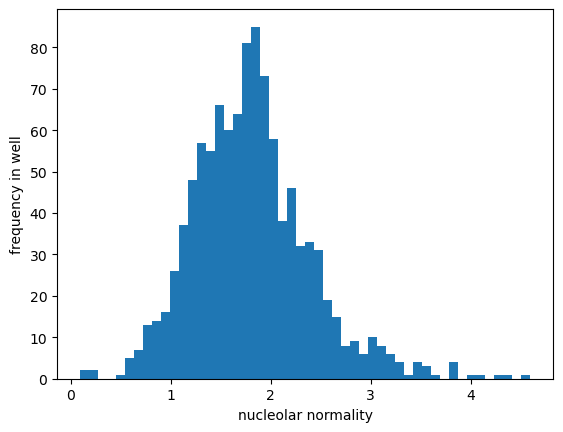

In [11]:
plt.hist(dfavg['normality_score'],bins=50)
plt.xlabel('nucleolar normality')
plt.ylabel('frequency in well')
plt.show()

Text(0, 0.5, 'Normality_Score')

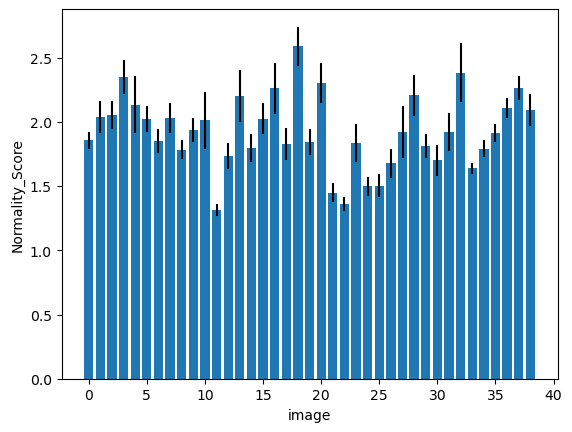

In [12]:
#get the image averages and stdevs
dfimgavg=dfavg.groupby('name').agg('mean')
dfimgsterr=dfavg.groupby('name').agg(lambda x:x.std()/np.sqrt(len(x)))
plt.bar(range(len(dfimgavg)),dfimgavg['normality_score'].values,
        yerr=dfimgsterr['normality_score'].values)
plt.xlabel('image')
plt.ylabel('Normality_Score')